In [1]:
# run this only once!!
import os
os. chdir("../..")
os.getcwd()

'/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments'

In [2]:
import networkx as nx
from graphcase_experiments.algos.GraphCaseWrapper import GraphCaseWrapper
from graphcase_experiments.tools.embedding_plotter import plot_embedding
from graphcase_experiments.tools.calculate_embed import calculate_graphcase_embedding
from graphcase_experiments.algos.MultiLENSwrapper import MultilensWrapper

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Analysis of MultiLens model.
- We create embedding of MultilENS and GraphCASE and visually compares those. From this the GraphCASE embedding looks more structured, hence the better results on clustering.
- I've looked at which labels are most mis-classified by GraphCase and MultiLENS.

----------------------------------
[Input graph file] graphcase_experiments/algos/processing_files/multilensedge_list.tsv
[Input category file] graphcase_experiments/algos/processing_files/multilenscategories.tsv
[Output embedding file] graphcase_experiments/algos/processing_files/multilensmultilens_embeddings.tsv
[Embedding dimension] 128
[Number of levels] 2
[Base of logarithm binning] 2
[Relational operators] ['mean', 'var', 'sum', 'max', 'min', 'L1', 'L2']
----------------------------------
[weighted graph detected.]
[max_node_id] 559
[num_nodes] 560
[shape of adj_matrix] (560, 560)
[Initial_feature_all finished]
[Generate combined feature vetor] node: 0
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: mat

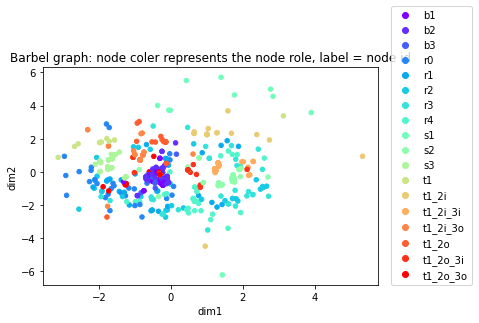

In [16]:
SOURCE_PATH = 'graphcase_experiments/graphs/sampled_ring_graphs/'
G = nx.read_gpickle(SOURCE_PATH + 'fraction0.5_delta0.7_seed10.pickle')

algo = MultilensWrapper
embed_multilens, tbl_multilens = calculate_graphcase_embedding(
    G, algo.LOCATION, params=algo.COMP_PARAMS, verbose=False, algo=algo
)
plot_embedding(G, embed_multilens)

In [19]:

from graphcase_experiments.experiments.ring_exp import classify_svm

clas_res_ml = classify_svm(tbl_multilens)
print(f"f1 macro: {clas_res_ml['f1_macro']}, f1 micro: {clas_res_ml['f1_micro']} for MultiLens")

f1 macro: 0.8221492568858177, f1 micro: 0.85 for MultiLens


2022-06-03 09:02:21.824743: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-06-03 09:04:58.363519: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


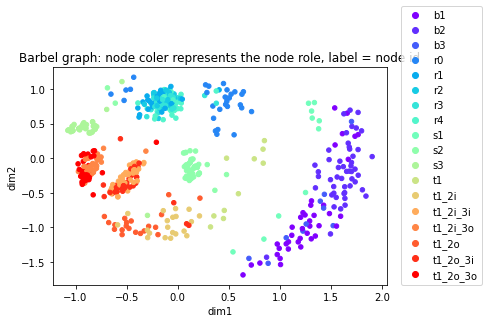

In [5]:
algo = GraphCaseWrapper
embed_gc, tbl_gc = calculate_graphcase_embedding(
    G, algo.LOCATION, params=algo.COMP_PARAMS, verbose=False, algo=algo
)
plot_embedding(G, embed_gc)

In [10]:
clas_res_gc = classify_svm(tbl_gc)
print(f"f1 macro: {clas_res_gc['f1_macro']}, f1 micro: {clas_res_gc['f1_micro']} for GraphCASE")

f1 macro: 0.8221238582545156, f1 micro: 0.8464285714285714 for MultiLens


In [25]:
# check if both result tables have the same labels
import pandas as pd
tbl_gc['label_gc'] = tbl_gc['label']
tbl_gc['label_id_gc'] = tbl_gc['label_id']
tbl_gc['pred_label_gc'] = tbl_gc['pred_label']
tmp = tbl_gc[['label_gc', 'label_id_gc', 'id', 'pred_label_gc']]

combined = tmp.merge(tbl_multilens[['label', 'label_id', 'id', 'pred_label']], how='inner', on='id' )
combined


,label_gc,label_id_gc,id,pred_label_gc,label,label_id,pred_label
0,r0,0,0.0,0,r0,0,0
1,r1,1,1.0,1,r1,1,1
2,r2,2,2.0,2,r2,2,2
3,r3,3,3.0,3,r3,3,3
4,r4,4,4.0,4,r4,4,4
...,...,...,...,...,...,...,...
555,t1_2o_3o,14,555.0,14,t1_2o_3o,14,14
556,t1_2o_3i,13,556.0,13,t1_2o_3i,13,7
557,t1_2o_3i,13,557.0,13,t1_2o_3i,13,13
558,t1_2o_3o,14,558.0,14,t1_2o_3o,14,14


In [28]:
# check if all labels are same
same_label_cnt = sum(combined['label']==combined['label_gc'])
same_label_id_cnt = sum(combined['label_id']==combined['label_id_gc'])
print(f"nubmer of same labels: {same_label_cnt} / expected 560, number of same label ids {same_label_id_cnt}")

nubmer of same labels: 560 / expected 560, number of same label ids 560


In [30]:
# number of same prediction
combined['gc_correct'] = combined['label_id_gc'] == combined['pred_label_gc']
combined['ml_correct'] = combined['label_id'] == combined['pred_label']

print(f"Correct predicted labels graphcase: {sum(combined['gc_correct'])}")
print(f"Correct predicted labels multilens: {sum(combined['ml_correct'])}")

Correct predicted labels graphcase: 506
Correct predicted labels multilens: 499


In [22]:
tbl_gc.columns

Index(['id', 'embed0', 'embed1', 'embed2', 'embed3', 'embed4', 'embed5',
       'embed6', 'embed7', 'embed8',
       ...
       'embed123', 'embed124', 'embed125', 'embed126', 'embed127', 'label',
       'label_id', 'pred_label', 'label_gc', 'label_id_gc'],
      dtype='object', length=134)